# Introduction 

With its enormous collection of movie information as well as millions of user contributors, the Internet Movie Database (IMDb) website is the 3rd most visited movie-related site worldwide, behind only Youtube and Netflix according to similarweb.com. Given its popularity, The IMDb rating system has become a widely accepted and trusted indicator of a film’s critical reception among consumers. A strong IMDb rating can generate positive word of mouth, drive ticket sales, and ultimately help the film achieve long-term success while a low IMDb rating can have the opposite effect, tanking the film’s reputation. 

Given its widespread use and influence on consumer behaviour, IMDb ratings are an important metric for movie studios and distributors to consider. The goal of this project is to develop a model that can accurately predict a film’s IMDb rating, solely using data available pre-release of the film. This will help movie studios make informed decisions when planning and executing projects as well as provide valuable insights into the factors that contribute to a strong rating.


# Dataset Description

IMDb Data files download: https://datasets.imdbws.com/

IMDb data files documentation: https://www.imdb.com/interfaces/	

The dataset used in this project is gathered from IMDb’s public domain datasets on its media, which are listed as accessible to customers for personal use. These datasets provide us with a breadth of information that can be used to train our model including movie title, genre, actors/actresses, directors, writers, runtime, release year, and average rating. 

However, the dataset also includes TV show data and crew information that is not relevant to our analysis, so it will be filtering out these unnecessary fields. We are also narrowing the scope of our analysis to US, non-adult films released after 1980 with more than 25000 ratings. After considering the size of the data, these parameters felt like an appropriate balance between having a large enough dataset to train our model while remaining manageable to work with. This should improve the accuracy and reliability of our results. More detail on the data cleaning and its rationale is provided below. Finally we merge the cleaned datasets into one master table used to train our model.



First we import our required libraries for data manipulation and analysis

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

sns.set(color_codes=True)

_Note: The following code is commented out as the raw files were saved and cleaned on a different machine before transfering the cleaned data to this workspace._

From the akas table, we drop irrelevant columns and remove non-US region movies:

In [ ]:
# akas = pd.read_csv("/content/gdrive/MyDrive/MSCI 446 Dataset/title.akas.tsv/data.tsv", sep='\t', low_memory=False)
# akas = akas.drop(['ordering', 'language', 'types', 'attributes', 'isOriginalTitle'], axis=1)
# akas = akas.loc[(akas["region"]=="US")]
# akas.to_csv('akasCleaned.csv', index=False)
# !cp akasCleaned.csv "/content/gdrive/MyDrive/MSCI 446 Dataset/title.akas.tsv/"

# akasCleaned = pd.read_csv("/content/gdrive/MyDrive/MSCI 446 Dataset/title.akas.tsv/akasCleaned.csv", low_memory=False)
# akasCleaned

From basics table, we drop irrelevant columns and filter out non movie types, adult movies, and movies before 1950 (this was an inital decision, we decide to set 1980 as a start year boundary later on):

In [ ]:
#  basics = pd.read_csv("/content/gdrive/MyDrive/MSCI 446 Dataset/title.basics.tsv/data.tsv", sep='\t', low_memory=False)
#  basics = basics.drop(['endYear'], axis=1)
#  basics = basics.loc[basics['isAdult'] == "0"]
#  basics = basics.loc[basics['titleType'] == "movie"]
#  basics = basics.loc[basics['startYear'] != "\\N"]
#  basics['startYear'] = basics['startYear'].astype('int')
#  basics = basics.loc[basics['startYear'] <= 1950]
#  basics = basics.drop(['titleType', 'isAdult'], axis=1)

#  basics.to_csv('basicsCleaned.csv', index=False)
#  !cp basicsCleaned.csv "/content/gdrive/MyDrive/MSCI 446 Dataset/title.basics.tsv/"

# basicsCleaned = pd.read_csv("/content/gdrive/MyDrive/MSCI 446 Dataset/title.basics.tsv/basicsCleaned.csv", low_memory=False)
# basicsCleaned

From the principals table (named data.csv below), we keep only the movie title identifier (tconst) and name identifier (nconst) as well as the job category of person in that movie. We keep only primary job categories of director, producer, actor/actress, and writer, ignoring smaller roles such as editor, costume designer, etc:

In [ ]:
#  data = pd.read_csv('data.tsv', sep='\t')
#  data = data[['tconst', 'nconst', 'category']]
#  desired_categories = ['director', 'producer', 'actor', 'actress', 'writer']
#  data = data[data['category'].isin(desired_categories)]
#  data.to_csv('prinicpalsCleaned.csv', index=False)

# principalsCleaned = pd.read_csv("/content/drive/MyDrive/MSCI_446_Dataset/prinicpalsCleaned.csv")
# principalsCleaned.head(10)

The ratings table did not require cleaning:

In [ ]:
# ratings = pd.read_csv("/content/gdrive/MyDrive/MSCI 446 Dataset/title.ratings.tsv/data.tsv", sep='\t', low_memory=False)
# ratings.head(10)
# ratings.to_csv('ratingsCleaned.csv', index=False)
# !cp ratingsCleaned.csv "/content/gdrive/MyDrive/MSCI 446 Dataset/"

We then begin process of merging these tables. Again this was done a different machine hence the code being commented out

Merging akas and basics based on tconst column

In [ ]:
# akas = pd.read_csv("/content/gdrive/MyDrive/MSCI 446 Project/DataSets/akasCleaned.csv", low_memory=False)
# basics = pd.read_csv("/content/gdrive/MyDrive/MSCI 446 Project/DataSets/basicsCleaned.csv", low_memory=False)
# principals = pd.read_csv("/content/gdrive/MyDrive/MSCI 446 Project/DataSets/prinicpalsCleaned.csv", low_memory=False)
# ratings = pd.read_csv("/content/gdrive/MyDrive/MSCI 446 Project/DataSets/ratingsCleaned.csv", low_memory=False)

# akas=akas.rename(columns={'titleId':'tconst'})
# merged=pd.merge(akas,basics, on='tconst')
# merged=merged.drop_duplicates(subset=['tconst'])
# merged.head(10)

We then drop the category column from principals and group entire crew (director,actor,writer) of film into 1 array entry per movie

In [ ]:
# principals=principals.drop('category', axis=1)
# principals = principals.groupby('tconst').apply(lambda x: ','.join(x['nconst'].astype(str)))
# principals.head()

Dropping duplicate/uneccesary columns:

In [ ]:
# merged=pd.merge(merged,mergedName, on='tconst')
# merged = merged.drop(['region', 'primaryTitle'], axis=1)
# merged = merged.rename(columns={'originalTitle':'title'})
# merged.head()


In [ ]:
# merged = pd.read_csv("/content/gdrive/MyDrive/MSCI 446 Project/DataSets/merged.csv", low_memory=False)
# merged=merged.drop(['title.1','nconst','category'],axis=1)
# merged.head()

Cleaning and merging principals into final merged table:

In [ ]:
# mergedName = pd.merge(merged,principals, on='tconst')
# mergedName=mergedName.groupby('tconst').apply(lambda x: ','.join(x['nconst'].astype(str)))
# final=pd.merge(merged,mergedName, on='tconst')
# final.head(10)
# mergedName = mergedName.reset_index()
# mergedName=mergedName.rename(columns={0:'nconst'})
# final.to_csv('final.csv', index=False)
# !cp final.csv "/content/gdrive/MyDrive/MSCI 446 Project/DataSets/"
# mergedName.head()

Removing null values and saving final merged csv file:

In [ ]:
# final_df = pd.read_csv("/content/gdrive/MyDrive/MSCI 446 Project/DataSets/final.csv", low_memory=False)

# final_df['averageRating'] = final_df['averageRating'].astype(float)

# final_df = final_df[final_df['tconst'] != '\\N']
# final_df = final_df[final_df['title'] != '\\N']
# final_df = final_df[final_df['startYear'] != '\\N']
# final_df = final_df[final_df['runtimeMinutes'] != '\\N']
# final_df = final_df[final_df['genres'] != '\\N']
# final_df = final_df[final_df['averageRating'] != '\\N']
# final_df = final_df[final_df['numVotes'] != '\\N']

# final_df.to_csv('allDF.csv', index=False)

# !cp allDF.csv "/content/gdrive/MyDrive/MSCI 446 Project/DataSets/"
#  final_df.head()

In [ ]:
imdbDF = pd.read_csv("allDF.csv", low_memory=False)
imdbDF.head()

,tconst,title,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst
0,tt0021617,Arizona Territory,1950,56,Western,6.0,53,"nm0581611,nm0934290,nm0167395,nm0766912,nm0601..."
1,tt0031603,Made in Germany - Die dramatische Geschichte d...,1957,101,"Biography,Drama",6.5,17,"nm0549032,nm0705384,nm0754240,nm0386076,nm0772..."
2,tt0035423,Kate and Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,86340,"nm0000212,nm0413168,nm0000630,nm0005227,nm0003..."
3,tt0035933,Elephant Fury,1953,100,"Drama,War",5.3,14,"nm0682176,nm0127058,nm0955146,nm0927236,nm0084..."
4,tt0036493,Black Devils of Kali,1954,80,"Action,Adventure,Mystery",5.4,45,"nm0000851,nm0546918,nm0612219,nm0869197,nm0130..."


Now that we have a single csv file to work with that includes all our required data, we run some data visualization and complete some final cleaning and data transformation

In [ ]:
num_ratings = imdbDF["numVotes"]
num_ratings
max_ratings = imdbDF["numVotes"].max()
print(max_ratings)

2721279


The movie with the greatest total number of votes has 2.7 million votes

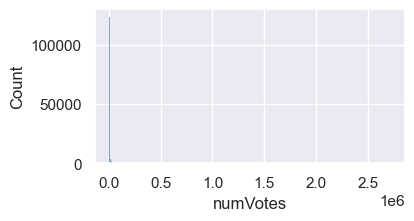

In [ ]:
plt.figure(figsize=(4, 2))
sns.histplot(num_ratings, bins=range(0,max_ratings,10000))
plt.show()

We can see that the number of total votes for a movie decreases exponentially, with a vast majority of movies having very few ratings

In [ ]:
print(len(num_ratings))
imdbDF_votes5 = imdbDF.drop(imdbDF[imdbDF.numVotes < 5000].index)
print(len(imdbDF_votes5))
imdbDF_votes10 = imdbDF.drop(imdbDF[imdbDF.numVotes < 10000].index)
print(len(imdbDF_votes10))
imdbDF_votes25 = imdbDF.drop(imdbDF[imdbDF.numVotes < 25000].index)
print(len(imdbDF_votes25))
imdbDF_votes50 = imdbDF.drop(imdbDF[imdbDF.numVotes < 50000].index)
print(len(imdbDF_votes50))

134164
14880
10101
5978
3852


Based on these totals, 25000 was chosen as a reasonable threshold of votes

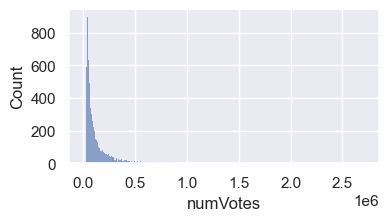

In [ ]:
num_ratings = imdbDF_votes25["numVotes"]
plt.figure(figsize=(4, 2))
sns.histplot(num_ratings, bins=range(0,max_ratings,10000))
plt.show()

We still see the exponential decrease, but the total magnitudes are more reasonable

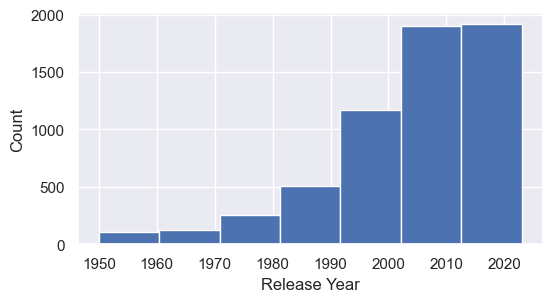

In [ ]:
plt.figure(figsize=(6, 3))
plt.hist(imdbDF_votes25['startYear'], bins=7)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

Most of our dataset are movies released after 1990, so we remove the older ones:

In [ ]:
imdbDF_year90 = imdbDF_votes25.drop(imdbDF_votes25[imdbDF_votes25.startYear < 1990].index)

Next let's take a look at the distribution of ratings and its relaionship with certain variables

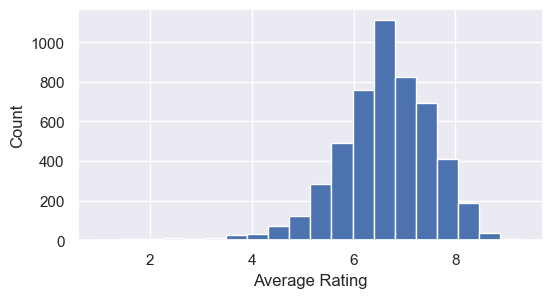

In [ ]:
#Histogram for average rating distribution
plt.figure(figsize=(6, 3))
plt.hist(imdbDF_year90['averageRating'], bins=20)
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()

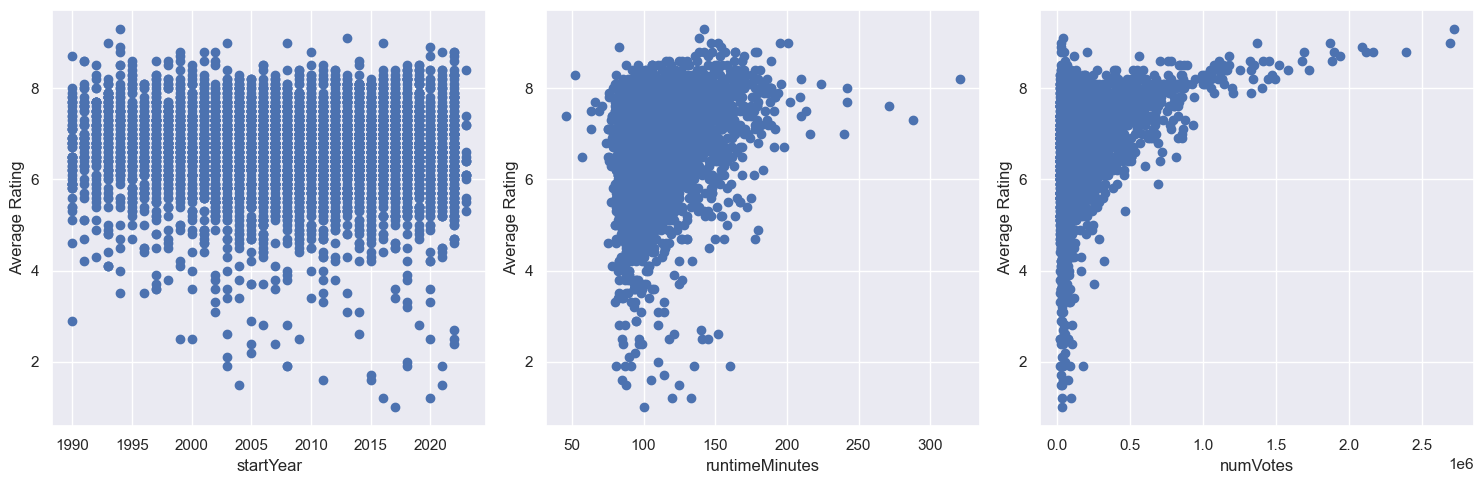

In [ ]:
#scatter plots for relation between numerical features and average rating
feature_columns = ['startYear', 'runtimeMinutes', 'numVotes']

fig, axs = plt.subplots(1, len(feature_columns), figsize=(15, 5))

for i, col in enumerate(feature_columns):
    if imdbDF_year90[col].dtype == 'object':
        rating_values = [imdbDF_year90.loc[imdbDF_year90[col] == val, 'averageRating'] for val in imdbDF_year90[col].unique()]
        axs[i].boxplot(rating_values)
        axs[i].set_xticklabels(imdbDF_year90[col].unique(), rotation=90)
        axs[i].set_xlabel(col)
    else:
        axs[i].scatter(imdbDF_year90[col], imdbDF_year90['averageRating'])
        axs[i].set_xlabel(col)
    axs[i].set_ylabel('Average Rating')

plt.tight_layout()
plt.show()

We can deduce that films released later have a wider distribution of ratings, and that average rating has a positive relationship with runtime and number of votes

Next, to convert our categorical values of genres and crew members into numerical values, we assign dummy variables. We code movies with 1 if that genre/crew member is present and 0 otherwise

In [ ]:
dummyGenres = imdbDF_year90['genres'].str.join(sep='').str.get_dummies(sep=',')
print(dummyGenres.columns)
dummyGenres.head()

Index(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')


,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
22451,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
22469,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22478,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22480,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
dummyNames = imdbDF_votes25['nconst']
dummyNames = dummyNames.str.join(sep='').str.get_dummies(sep=',')
dummyNames.head()

,nm0000001,nm0000002,nm0000003,nm0000004,nm0000005,nm0000006,nm0000007,nm0000008,nm0000009,nm0000011,...,nm9931333,nm9936180,nm9937520,nm9940627,nm9948845,nm9967768,nm9973430,nm9974256,nm9982544,nm9985727
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
finalDF = pd.merge(dummyGenres,dummyNames, left_index=True, right_index=True)
finalDF = pd.merge(imdbDF_votes25,finalDF, left_index=True, right_index=True)
finalDF.head()

,tconst,title,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst,Action,Adult,...,nm9931333,nm9936180,nm9937520,nm9940627,nm9948845,nm9967768,nm9973430,nm9974256,nm9982544,nm9985727
2,tt0035423,Kate and Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,86340,"nm0000212,nm0413168,nm0000630,nm0005227,nm0003...",0,0,...,0,0,0,0,0,0,0,0,0,0
22451,tt0098966,Three Men and a Little Lady,1990,104,"Comedy,Drama,Family",5.4,25455,"nm0181202,nm0000633,nm0000430,nm0001101,nm0001...",0,0,...,0,0,0,0,0,0,0,0,0,0
22469,tt0099005,Air America,1990,113,"Action,Comedy,War",5.8,29450,"nm0000154,nm0000375,nm0001802,nm0420898,nm0006...",1,0,...,0,0,0,0,0,0,0,0,0,0
22478,tt0099044,Another 48 Hrs.,1990,95,"Action,Comedy,Crime",5.9,42861,"nm0211823,nm0000552,nm0000560,nm0001397,nm0001...",1,0,...,0,0,0,0,0,0,0,0,0,0
22480,tt0099052,Arachnophobia,1990,109,"Comedy,Horror,Thriller",6.5,72013,"nm0888994,nm0001099,nm0001696,nm0000422,nm0468...",0,0,...,0,0,0,0,0,0,0,0,0,0


Now let's take a look at each genre's distribution of average rating:

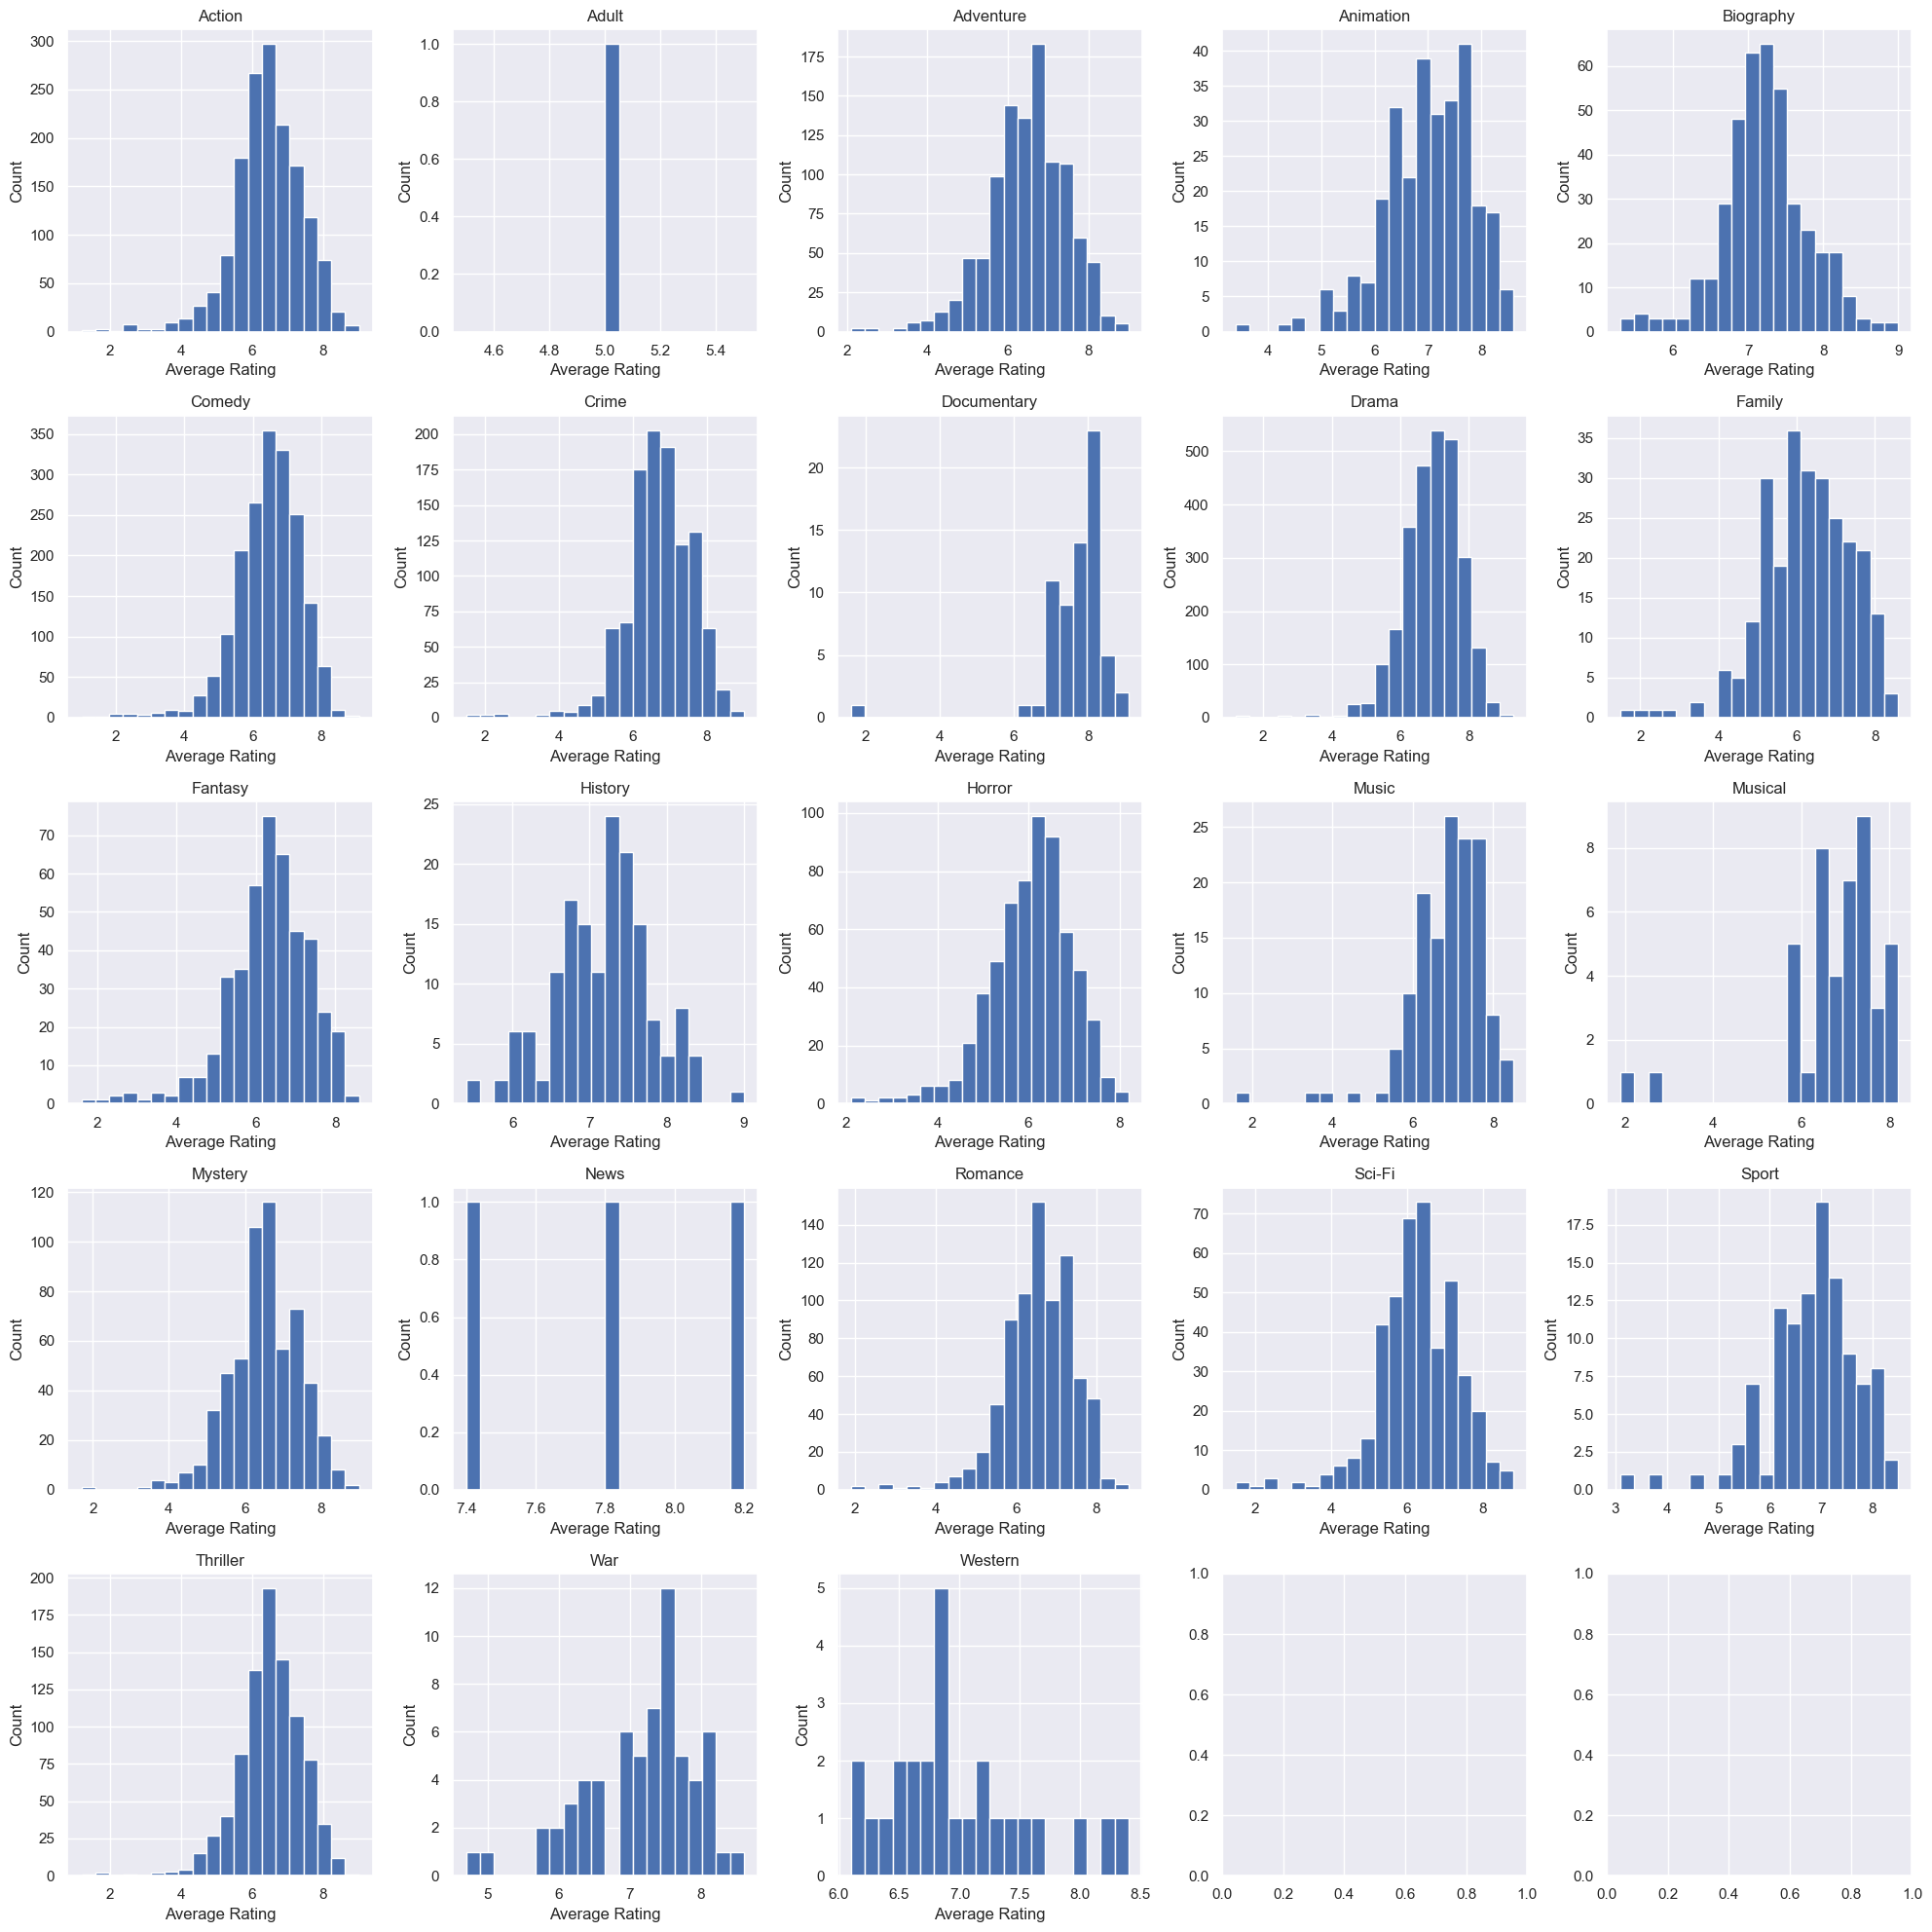

In [ ]:
genres=['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western']

fig, axs = plt.subplots(5, 5, figsize=(20, 20))

for i, genre in enumerate(genres):

    temp = finalDF[['averageRating', genre]]
    temp = temp.drop(temp[temp[genre] == 0].index)

    row = i // 5
    col = i % 5

    axs[row, col].hist(temp['averageRating'], bins=20)
    axs[row, col].set_xlabel('Average Rating')
    axs[row, col].set_ylabel('Count')
    axs[row, col].set_title(genre)

plt.tight_layout()

plt.show()

A singular adult movie somehow found its way into the dataset despite previously filtering them out. Let's remove it along with the "News" movies of which there are only 3:

In [ ]:
finalDF = finalDF.drop(finalDF[finalDF['News'] == 1].index)
finalDF = finalDF.drop(finalDF[finalDF['Adult'] == 1].index)

# Machine Learning

Now we begin building our model. The first approach is use Linear Regression and K-Fold Cross Validation with all of our table's numeric features to train the model

In [ ]:
finalDF.reset_index(drop=True, inplace=True)
kf = KFold(n_splits=5,shuffle=True, random_state=42)
scores = []

for train_index, test_index in kf.split(finalDF):
    # split the data into training and testing sets for this fold
    train_df = finalDF.loc[train_index]
    test_df = finalDF.loc[test_index]

    # fit a linear regression model
    model = LinearRegression()
    # dropping non numeric columns
    model.fit(train_df.drop(["averageRating", "tconst", "title", "genres", "nconst"], axis=1), train_df["averageRating"])

    # evaluate the model on the test set for this fold
    score = model.score(test_df.drop(["averageRating", "tconst", "title", "genres", "nconst"], axis=1), test_df["averageRating"])
    scores.append(score)

# calculate the mean and standard deviation of the R^2 scores
mean_score = sum(scores) / len(scores)
std_score = np.std(scores)

print(f'Mean R^2 score: {mean_score:.2f} +/- {std_score:.2f}')

Mean R^2 score: -53368830639.24 +/- 93669170466.73


Something has clearly gone wrong here as our R squared value is incomprehensible, so let's try the linear regression model without K Fold cross validation:

In [ ]:
train_df, test_df = train_test_split(finalDF, test_size=0.8, random_state=42)
train_df.drop(["averageRating"], axis=1)

,tconst,title,startYear,runtimeMinutes,genres,numVotes,nconst,Action,Adult,Adventure,...,nm9931333,nm9936180,nm9937520,nm9940627,nm9948845,nm9967768,nm9973430,nm9974256,nm9982544,nm9985727
4995,tt8579674,1917,2019,119,"Action,Drama,War",611246,"nm0854991,nm2835616,nm1126657,nm0990547,nm0000...",1,0,0,...,0,0,0,0,0,0,0,0,0,0
2308,tt0800369,"Thor, God of Thunder",2011,115,"Action,Fantasy",861920,"nm0698873,nm1165110,nm0000164,nm0000204,nm1089...",1,0,0,...,0,0,0,0,0,0,0,0,0,0
1555,tt0361467,Confessions of a Teenage Drama Queen,2004,89,"Comedy,Family,Music",30085,"nm0517820,nm1083271,nm0305081,nm0000444,nm0837...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
4624,tt5323662,A Silent Voice: The Movie,2016,130,"Animation,Drama",87086,"nm2488310,nm0997115,nm2977461,nm2976492,nm2770...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
3190,tt1408253,Ride Along,2014,99,"Action,Comedy,Crime",117510,"nm0023297,nm0001084,nm0366389,nm1754366,nm0000...",1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,tt4160708,A Man in the Dark,2016,88,"Crime,Horror,Thriller",282675,"nm0002332,nm3994408,nm1910255,nm4683167,nm1793...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
466,tt0115988,The Crucible,1996,124,"Drama,History",38801,"nm0000358,nm0000213,nm0006890,nm0000260,nm0405...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
3092,tt1322312,Going the Distance,2010,103,"Comedy,Romance",59093,"nm0000106,nm0519043,nm0515296,nm0206359,nm0123...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
3772,tt2017020,The Smurfs 2,2013,105,"Adventure,Animation,Comedy",43552,"nm0456732,nm0000439,nm1724323,nm2953537,nm0000...",0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
model = LinearRegression()
model.fit(train_df.drop(["averageRating", "tconst", "title", "genres", "nconst"], axis=1), train_df["averageRating"])
predictions = model.predict(test_df.drop(["averageRating", "tconst", "title", "genres", "nconst"], axis=1))

abs_error = (predictions - test_df['averageRating']).abs()
print('averge error', abs_error.mean())
r_sq = model.score(train_df.drop(["averageRating", "tconst", "title", "genres", "nconst"], axis=1), train_df["averageRating"])
print('r^2', r_sq)



averge error 0.5323007706778212
r^2 1.0


We received and r^2 value of 1.0, which is not realistic when predicting human behaviour and likely implies our model is overfitting. Upon further consideration, we believe this is because there is too much noise in our model from the exhaustive list of dummy variables created for each movie crew member. Instead, we are modifying our approach to build a simple linear regression model with 1 feature, and adding new features at a time in each iteration. 

Based on our data visualization from earlier, runtimeMinutes seems like a good place to start.

In [ ]:
model = LinearRegression()
model.fit(train_df[['runtimeMinutes']], train_df["averageRating"])
predictions = model.predict(test_df[['runtimeMinutes']])

abs_error = (predictions - test_df['averageRating']).abs()
print('averge error', abs_error.mean())
r_sq = model.score(train_df[['runtimeMinutes']], train_df["averageRating"])
print('r^2', r_sq)


averge error 0.6832314072980195
r^2 0.10948705387760127


Although our R squared value is quite low, it is at least feasible now. Next we add startYear (year of movie release) as a feature

In [ ]:
model = LinearRegression()
model.fit(train_df[['runtimeMinutes', 'startYear']], train_df["averageRating"])
predictions = model.predict(test_df[['runtimeMinutes', 'startYear']])

abs_error = (predictions - test_df['averageRating']).abs()
print('averge error', abs_error.mean())
r_sq = model.score(train_df[['runtimeMinutes', 'startYear']], train_df["averageRating"])
print('r^2', r_sq)


averge error 0.6818696123114211
r^2 0.11888341638467026


This gives slighly better errors, though there is still room for improvement. Next we add the list of genres as features to the model

In [ ]:
model = LinearRegression()
model.fit(train_df[['runtimeMinutes', 'startYear', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western']], train_df["averageRating"])
predictions = model.predict(test_df[['runtimeMinutes', 'startYear', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western']])

abs_error = (predictions - test_df['averageRating']).abs()
print('averge error', abs_error.mean())
r_sq = model.score(train_df[['runtimeMinutes', 'startYear','Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western']], train_df["averageRating"])
print('r^2', r_sq)


averge error 0.5984034832106716
r^2 0.2693670932266031


Adding the genres made a definite improvement to the model, which makes sense based on our data visualization as each genre's average rating distribution was skewed differently meaning different genres have a different effect on the rating. Next let's add the number of votes

In [ ]:
model = LinearRegression()
model.fit(train_df[['runtimeMinutes', 'startYear', 'numVotes', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western']], train_df["averageRating"])
predictions = model.predict(test_df[['runtimeMinutes', 'startYear', 'numVotes', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western']])

abs_error = (predictions - test_df['averageRating']).abs()
print('averge error', abs_error.mean())
r_sq = model.score(train_df[['runtimeMinutes', 'startYear', 'numVotes', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western']], train_df["averageRating"])
print('r^2', r_sq)


averge error 0.541147853880326
r^2 0.4017478080641036


Adding the number of votes improved our model, which makes sense since we could see a positive relationship with total number of votes and average rating. Higher rated movies tend to be more popular with more users voting on them on IMDb. 

However, the goal of this project was to predict IMDb ratings using pre-release movie data, and the number of IMDb votes would not be available before a movie is released.

Our initial approach of considering all the crew members individually did not work, but we would still like to incorporate the crew members into our model somehow. Instead, we will use the dummyNames dataframe from earlier to get the most frequently occuring directors/writers/actors/actresses. We assume that a movie with one of these top crew members would be higher rated, so we'll add a boolean column for containsTopCrewMember to our dataframe and add it as a feature to the model

In [ ]:
# WORK IN PROGRESS

# calculate the total number of appearances for each crew member
crew_counts = dummyNames.sum()

# displaying the most frequently occuring crew member coutnts
most_frequent_crew = crew_counts.sort_values(ascending=False)
print(most_frequent_crew.head(10))

# Create a set containing the nconsts of the top 100 crew
top_100_crew = set(most_frequent_crew.index[:100])


nm0000134    64
nm0748784    58
nm0079677    57
nm0000158    54
nm0000115    53
nm0000168    50
nm0089658    48
nm0000142    48
nm0271479    48
nm0004976    47
dtype: int64


Number of movies with at least one top 100 crew member: 2243


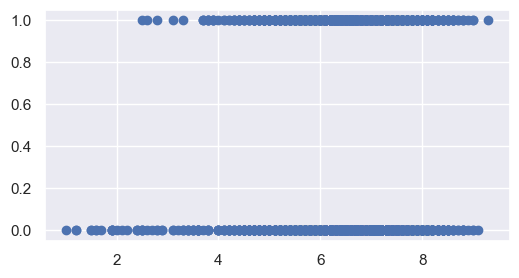

In [ ]:
# defining a function to check for top 100 crew member in dataframe
def contains_crew(s):
    if any(x in s for x in top_100_crew):
        return 1
    else:
        return 0

# applying function to new dataframe, adding containsTop100Crew column
finalDFTop100 = finalDF.copy()
finalDFTop100['containsTop100Crew'] = finalDFTop100['nconst'].apply(contains_crew)

num_true = finalDFTop100['containsTop100Crew'].sum()
print('Number of movies with at least one top 100 crew member:', num_true)

plt.figure(figsize=(6, 3))
plt.scatter(finalDFTop100['averageRating'],finalDFTop100['containsTop100Crew'])

Our hypothesis was correct, we can see that movies with a top 100 crew member have a tighter distribution and higher average rating. Let's add this feature to the model

In [ ]:
train_df, test_df = train_test_split(finalDFTop100, test_size=0.8, random_state=42)
train_df.drop(["averageRating"], axis=1)

model = LinearRegression()
model.fit(train_df[['runtimeMinutes', 'startYear', 'containsTop100Crew', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western']], train_df["averageRating"])
predictions = model.predict(test_df[['runtimeMinutes', 'startYear', 'containsTop100Crew', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western']])

abs_error = (predictions - test_df['averageRating']).abs()
print('averge error', abs_error.mean())
r_sq = model.score(train_df[['runtimeMinutes', 'startYear','containsTop100Crew', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western']], train_df["averageRating"])
print('r^2', r_sq)


averge error 0.5967301728156668
r^2 0.2698223975890752


Unfortunately, this did not make any significant changes to the model, though the average error decreased slightly. Perhaps the distribution of ratings with top 100 crew members is still too varied for it to significantly affect the model. We also experimented with using 25, 50, and 200 as thresholds instead but they produced similar results. Instead we manually add some of the most frequently occuring crew members as features to the model

In [ ]:
# getting a list of top crew members to copy into model
top_20_crew = most_frequent_crew[:20].index.to_numpy()
print(top_20_crew)

['nm0000134' 'nm0748784' 'nm0079677' 'nm0000158' 'nm0000115' 'nm0000168'
 'nm0089658' 'nm0000142' 'nm0271479' 'nm0004976' 'nm0000136' 'nm0000093'
 'nm0000246' 'nm0000242' 'nm0000354' 'nm0001191' 'nm0000095' 'nm0000230'
 'nm0000173' 'nm0586969']


In [ ]:
train_df, test_df = train_test_split(finalDFTop100, test_size=0.8, random_state=42)
train_df.drop(["averageRating"], axis=1)

model = LinearRegression()
model.fit(train_df[['runtimeMinutes', 'startYear', 'containsTop100Crew', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western', 'nm0000134', 'nm0748784', 'nm0079677', 'nm0000158', 'nm0000115', 'nm0000168',
 'nm0089658', 'nm0000142', 'nm0271479', 'nm0004976', 'nm0000136', 'nm0000093',
 'nm0000246', 'nm0000242', 'nm0000354', 'nm0001191', 'nm0000095', 'nm0000230',
 'nm0000173', 'nm0586969']], train_df["averageRating"])
predictions = model.predict(test_df[['runtimeMinutes', 'startYear', 'containsTop100Crew', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western', 'nm0000134', 'nm0748784', 'nm0079677', 'nm0000158', 'nm0000115', 'nm0000168',
 'nm0089658', 'nm0000142', 'nm0271479', 'nm0004976', 'nm0000136', 'nm0000093',
 'nm0000246', 'nm0000242', 'nm0000354', 'nm0001191', 'nm0000095', 'nm0000230',
 'nm0000173', 'nm0586969']])

abs_error = (predictions - test_df['averageRating']).abs()
print('averge error', abs_error.mean())
r_sq = model.score(train_df[['runtimeMinutes', 'startYear','containsTop100Crew', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western', 'nm0000134', 'nm0748784', 'nm0079677', 'nm0000158', 'nm0000115', 'nm0000168',
 'nm0089658', 'nm0000142', 'nm0271479', 'nm0004976', 'nm0000136', 'nm0000093',
 'nm0000246', 'nm0000242', 'nm0000354', 'nm0001191', 'nm0000095', 'nm0000230',
 'nm0000173', 'nm0586969']], train_df["averageRating"])
print('r^2', r_sq)


averge error 0.6004637955910187
r^2 0.2847599344078673


This slighly improved our r squared. Let's try K Fold cross validation again now on this final model

In [ ]:


X = finalDFTop100[['runtimeMinutes', 'startYear', 'containsTop100Crew', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western', 'nm0000134', 'nm0748784', 'nm0079677', 'nm0000158', 'nm0000115', 'nm0000168',
       'nm0089658', 'nm0000142', 'nm0271479', 'nm0004976', 'nm0000136', 'nm0000093',
       'nm0000246', 'nm0000242', 'nm0000354', 'nm0001191', 'nm0000095', 'nm0000230',
       'nm0000173', 'nm0586969']]
y = finalDFTop100['averageRating']

model = LinearRegression()

mae_scores = abs(cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error'))
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')


print('Average MAE score:', mae_scores.mean())
print('Average R-squared score:', r2_scores.mean())


Average MAE score: 0.5997240029823799
Average R-squared score: 0.28029986659277356


We got more or less the same results with the more sophisticated K fold cross validation testing as we did with our simple splitting testing

## Surprising/Unexpected Results:

What surprised us initially was how poorly our first model with all the available features performed. We though the more features we had, the better it would perform but it ended up resulting in overfitting since we had tens of thousands of columns for the dummyNames. It was interesting to learn that sometimes simple is better, as we made much more progress begining with just 1 feature and iterating from there. It was also dissapointing to see the Top100Crew feature we implemented ourselves not making much of an improvement to the model even though we saw the differences present in the data visualization.

# Conclusions

## Summary of findings

In summary, we began with a model with incomprehensible results due to too many features. We then modified our approach to start with a simple model using only runtime as a feature which gave an average error of 0.683 and R squared of 0.109.
 
Then we added startYear, which returned an average error of 0.681 and R squared of 0.118. 

Adding genres was the first significant improvement, and our use of dummy variables for genres seemed to have paid off here with an average error of 0.598 and r squared of 0.269.

Adding number of votes also made improvements, and its inclusion gave us our best model with an average error of 0.541 and r squared of 0.401, but this feature was deemed as not realistic to include as number of votes would not be available for new movies. 

Then to incorporate movie crew, we created a new column to check if a movie contained a top 100 crew member (director, writer, actor) and added it as a feature, but this did not have an impact on our model.

So instead, we added the 20 most frequently occuring crew members as individual features using their dummy variables to the model similar to what we did for genre. This gave an average error of 0.600 and R squared of 0.284. We also performed k fold cross validation as a more sophisticated testing approach for this final model, but it did impact our error metrics.

## Real world meaning of results

Our models are not extremely accurate predictors of ratings, but this makes sense as IMDb ratings are based on real life user inputs, and predicting human behaviour is very challenging in machine learning. Being able to use the number of total ratings did give us a better prediction, which makes intuitive sense as more popular and well received movies would typically get more total ratings. This means it's easier to predict a movie's rating after it has already been released.

## Suprising aspects of this project

During this project, a surprising aspect we discovered was the significant amount of effort that goes in to preparing the dataset for learning. Initially we thought this step of the project would be quick as we were sourcing our data from IMDb's well-maintained dataset but even then, there were a considerable number of steps required to clean the individual tables for relevant data, and then merging these tables into one. This meticulous process is an often overlooked and less glamarous aspect of machine learning that lays the foundation for the success of the model, and an adequate amount of time and resources should be allocated to this phase of a project.

## Potential Next Steps

Next steps for this project would be to consider a different approach all together such as grouping movies by a measured similarity, and predicting the target movie's rating based on the average of its nearest neighbours. Similarity could be taken by comparing features like plot summaries and budget, but this info was not available in our dataset hence why this approach was not followed. 


